In [124]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from nfa_lib import ddict2dict
from matplotlib.ticker import FuncFormatter
import math


In [125]:
results = []
for prefix in [".", "1", "2", "3"]:
    with open(f"{prefix}/large_error_stats.pkl", "rb") as fd:
        results += pickle.load(fd)

In [126]:
df = pd.DataFrame(results)

In [127]:
df["transtr"] = df.transitions.map(lambda x: str(ddict2dict(x)))
df["rel_error"] = abs(df.estimate - df.bruteforce)/df.bruteforce
df.drop_duplicates(
    subset=["kappa_multiple", "transtr", "string_len", "bruteforce"],
    inplace=True)
for name, group in df.sort_values(by="kappa_multiple").groupby(["transtr", "string_len"]):
    first = group.iloc[0].rel_error
    df.loc[group.index, "dif_rel_error"] = group.rel_error / first
    

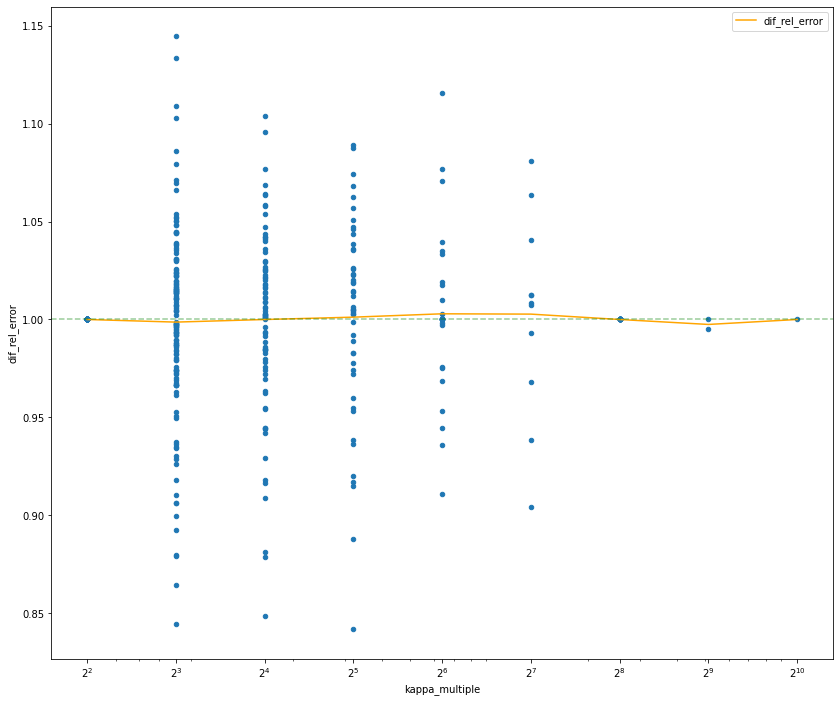

In [128]:
ax = df[["kappa_multiple", "dif_rel_error"]].plot.scatter(
    x="kappa_multiple", y="dif_rel_error", logx=True, figsize=(14,12)
)
df[["kappa_multiple", "dif_rel_error"]].groupby(
    "kappa_multiple"
).dif_rel_error.mean().to_frame().plot(ax=ax, c="orange")
plt.axhline(y=1, c="g", linestyle="--", alpha=0.4)
ax.set_xticks(sorted(df.kappa_multiple.unique()))
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x,y: "$2^{" + str(int(math.log(x,2))) + "}$"))


In [140]:
df.time.sum()/86400

5.629134759323464

In [137]:
for row in df.itertuples():
    for row_2 in df.itertuples():
        if row.transtr == row_2.transtr:
            continue
        assert row.transitions != row_2.transitions